### Data Understanding

Diamond, a mineral composed of pure carbon. It is the hardest naturally occurring substance known; it is also the most popular gemstone. Because of their extreme hardness, diamonds have a number of important industrial applications.  

**How much does a diamond cost?**  
The average price can range from $1,500 for a 0.5-carat diamond to $21,000 for a two-carat diamond.  

**The truth is** that answering this question is not easy because the price of a diamond can vary depending on a number of factors, including Clarity, Color, Cut, Carat, Shape and Fluorescence.    

Now let's use **DIAMOND dataset** for predicting a diamond's price.

The dataset has the following **features**:

1. price price in US dollars (\$326--\$18,823)
2. carat weight of the diamond (0.2--5.01)
3. cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
4. color diamond colour, from J (worst) to D (best)
5. clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
6. x length in mm (0--10.74)
7. y width in mm (0--58.9)
8. z depth in mm (0--31.8)
9. depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
10. table width of top of diamond relative to widest point (43--95)

### Exploratory Data Analysis

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("datasets/diamonds.csv")

In [3]:
dataset.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
dataset.shape

(53940, 11)

In [5]:
# Removing "Unnamed:0" column. This column doesn't contain any valuable information.
dataset = dataset.drop('Unnamed: 0', axis=1)

In [6]:
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [8]:
dataset.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
dataset.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

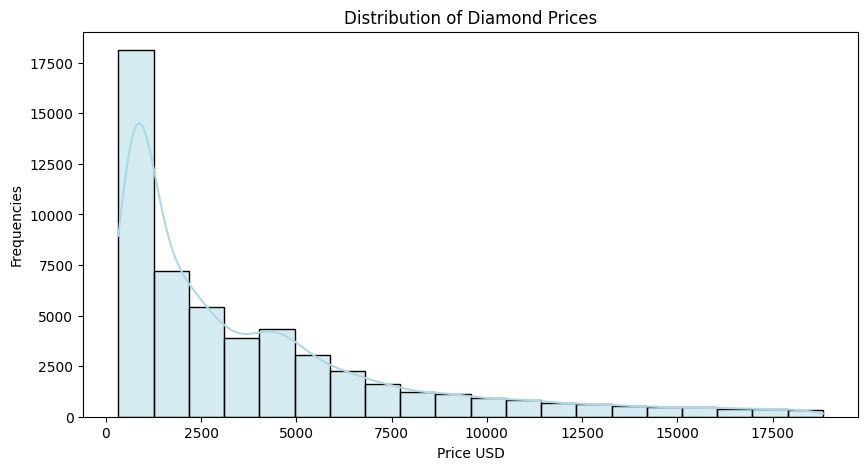

In [13]:
# Target Variable (Price) Distribution
plt.figure(figsize=(10, 5))
sns.histplot(dataset['price'], bins=20, kde=True, color='lightblue')
plt.title('Distribution of Diamond Prices')
plt.xlabel('Price USD')
plt.ylabel('Frequencies')
plt.show()

The model is highly skewed to the right. It may be because of the outliers, (Diamonds that cost more than 12500 are the outliers).
However, skewness isn't only caused by outliers. In some cases, the underlying distribution of the data naturally follows a skewed pattern.  
For example, luxury goods like diamonds may have many lower-priced items and a few very high-priced ones, which is common in real-world data.  

#### How to deal with the skewness now?
It depends on the type of model we are about to use:  

1. **Linear models (e.g., Linear Regression, Ridge, Lasso)**: These models assume that the relationship between features and the target variable is linear. They also work better when the residuals (errors) are normally distributed. In such cases, skewness in the target variable can negatively impact model performance, so transforming the target to reduce skewness is often beneficial.  

2. **Tree-based models (e.g., Decision Trees, Random Forest, Gradient Boosting, XGBoost)**: These models are generally less sensitive to skewness because they split data based on feature values and don't assume a linear relationship. In such cases, skewness may not be a major concern.  

3. **Neural Networks:** Depending on the architecture and activation functions, they might benefit from a less skewed distribution, but they can also handle non-normal distributions fairly well with proper training and scaling.

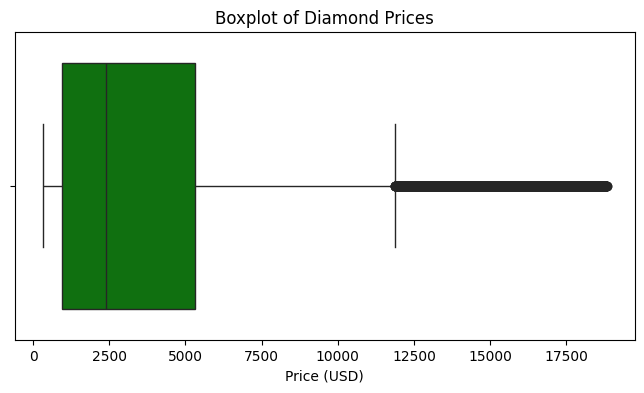

In [14]:
# Using boxplot for checking the outliers.

plt.figure(figsize=(8, 4))
sns.boxplot(x=dataset['price'], color='green')
plt.title('Boxplot of Diamond Prices')
plt.xlabel('Price (USD)')
plt.show()

There are many outliers, a diamond price above 12500 USD is considered to be an outlier.  
#### Strategies for handling outliers
1. Leave the outlier as-is.
    1. **Pros**: Keeps all the data intact, which may be important if predicting luxury diamonds is crucial.
    2. **Cons**: The model might get skewed towards these high values, especially for linear models, leading to overfitting or poor generalization.
2. Winsorization (Capping): Winsorization involves capping the extreme values at a certain threshold (e.g., the 1st and 99th percentiles), so outliers are replaced by more reasonable values.
    1. **Pros**: Reduces the impact of extreme outliers while keeping most of the data.
    2. **Cons**: You lose information about the real high-end prices, which could be important depending on your use case.
3. Log Transformation: A log transformation compresses the scale of the data, reducing the impact of outliers without actually removing them.
    1. **Pros**: Keeps all data points, while reducing the influence of very high-priced diamonds on model training.
    2. **Cons**: Interpretation of predictions can become less intuitive (predictions will be in the log-transformed scale).
4. Remove Outlier: Simply remove outliers beyond a certain threshold, such as values beyond 1.5 times the interquartile range (IQR).
    1. **Pros**: Removes extreme values, which might be erroneous or could hurt the model.
    2. **Cons**: You lose data, and those outliers could represent important cases (e.g., very high-priced diamonds).

#### How to Choose the Best Approach
1. **Business Case**: If predicting prices of very high-end diamonds is important for your task (e.g., for luxury diamond dealers), then you may want to keep outliers (or use log transformation) rather than removing them.
2. **Model Sensitivity**: If you're using a model that is sensitive to outliers (like Linear Regression), you may want to use log transformation or Winsorization to handle extreme values.
3. **Cross-validation**: You can try different strategies (capping, transformation, etc.) and compare model performance using cross-validation. If the performance improves significantly after outlier treatment, it may be worth applying.

#### Sensitive to Outliers:
1. Linear Regression
2. Logistic Regression
3. Support Vector Machines (SVM) with linear kernel
4. k-Nearest Neighbors (KNN)
5. Neural Networks (to some extent, depending on architecture)
#### Not Sensitive to Outliers:
1. Decision Trees
2. Random Forest
3. Gradient Boosting Machines (GBM)
4. XGBoost
5. Support Vector Machines (SVM) with non-linear kernels
6. Naive Bayes

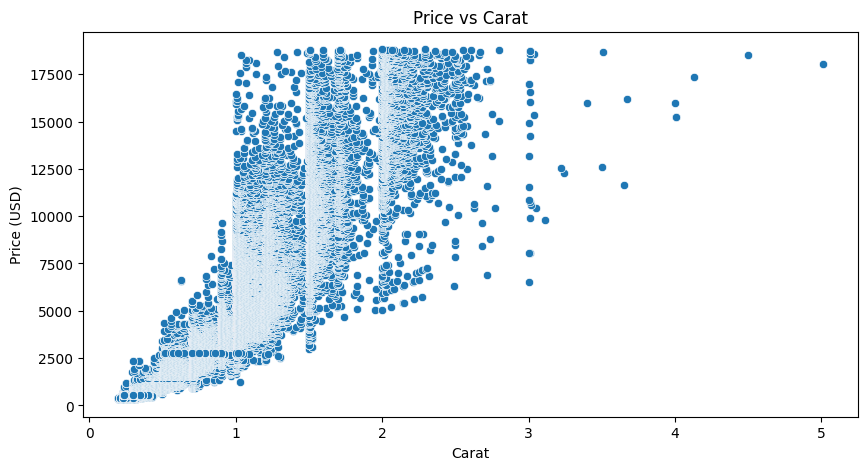

In [15]:
# Let's analyze diamond prices. 
# Analyzing first the relationship between 'carat' and the target variable '(price)'

plt.figure(figsize=(10, 5))
sns.scatterplot(x="carat", y="price", data=dataset)
plt.title('Price vs Carat')
plt.xlabel('Carat')
plt.ylabel('Price (USD)')
plt.show()

As the Carat **increases** the price **goes higher**.

In [17]:
# Let's now check the relationship between 'size' of a diamond and its price.

dataset['size'] = dataset['x'] * dataset['y'] * dataset['z']
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,size
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


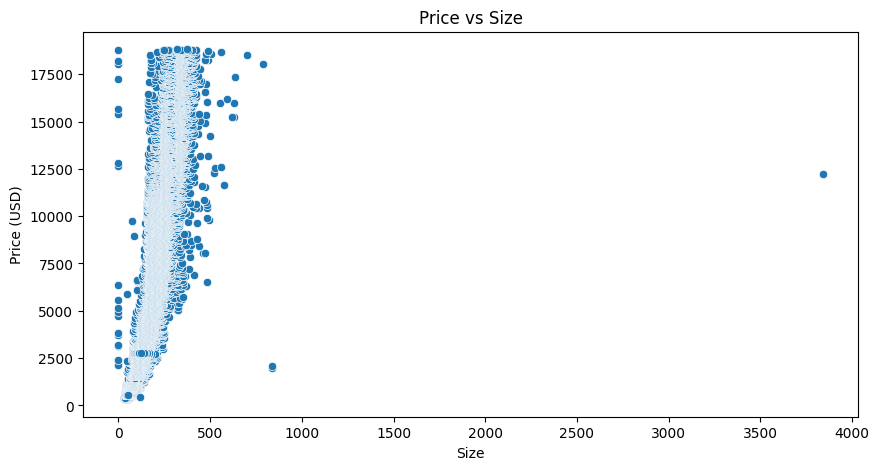

In [19]:
# Let's visualize the relationship between 'size' and 'price'

plt.figure(figsize=(10, 5))
sns.scatterplot(x="size", y="price", data=dataset)
plt.title('Price vs Size')
plt.xlabel('Size')
plt.ylabel('Price (USD)')
plt.show()

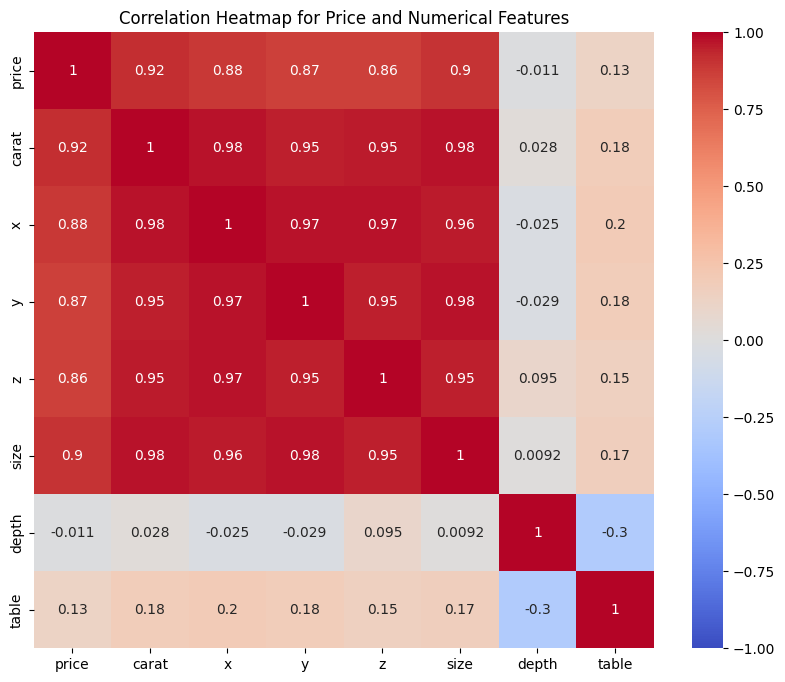

In [20]:
# Correlation matrix heatmap (NUMERICAL VARIABLES)
plt.figure(figsize=(10, 8))
correlation = dataset[['price', 'carat', 'x', 'y', 'z', 'size', 'depth', 'table']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Price and Numerical Features')
plt.show()

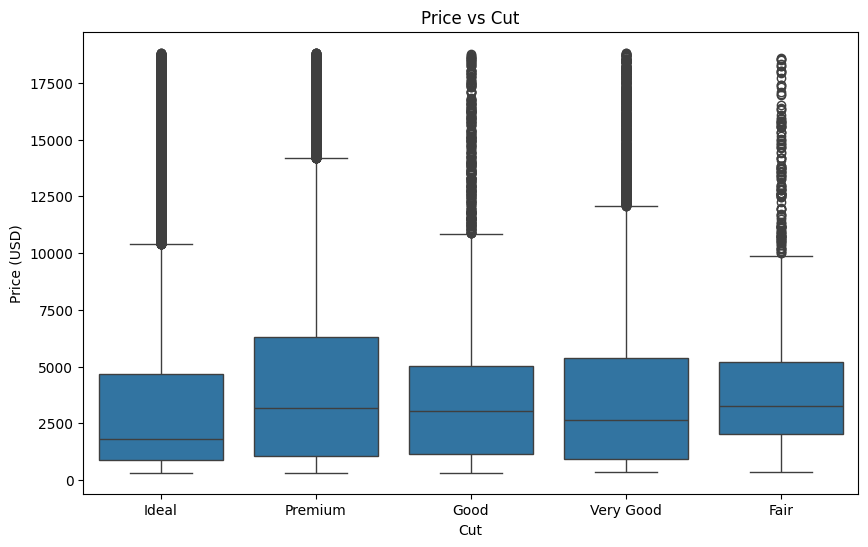

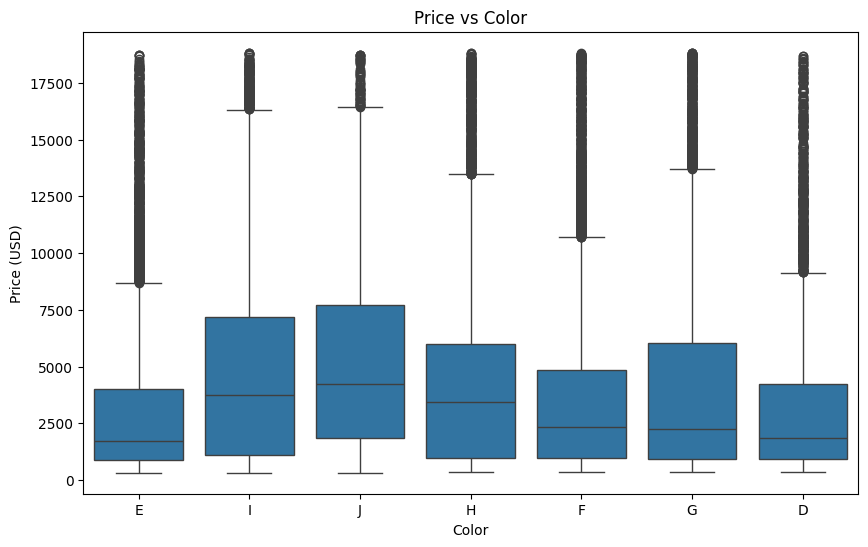

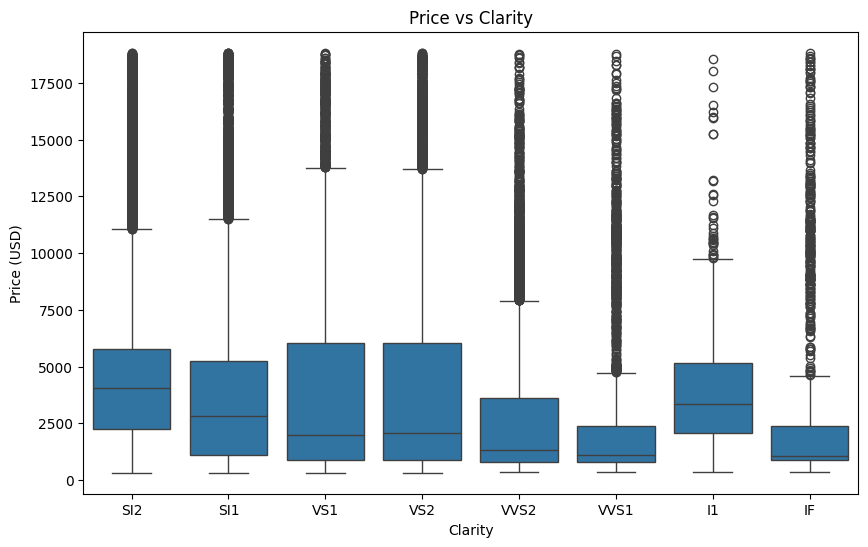

In [21]:
# Boxplot for price vs cut (CATEGORICAL VARIABLES)
plt.figure(figsize=(10, 6))
sns.boxplot(x='cut', y='price', data=dataset)
plt.title('Price vs Cut')
plt.xlabel('Cut')
plt.ylabel('Price (USD)')
plt.show()

# Boxplot for price vs color
plt.figure(figsize=(10, 6))
sns.boxplot(x='color', y='price', data=dataset)
plt.title('Price vs Color')
plt.xlabel('Color')
plt.ylabel('Price (USD)')
plt.show()

# Boxplot for price vs clarity
plt.figure(figsize=(10, 6))
sns.boxplot(x='clarity', y='price', data=dataset)
plt.title('Price vs Clarity')
plt.xlabel('Clarity')
plt.ylabel('Price (USD)')
plt.show()

These boxplots will show how price varies across the different categories of cut, color, and clarity. Outliers and the spread for each category are visible.
We can use boxplot comparison for gaining more insight about them.

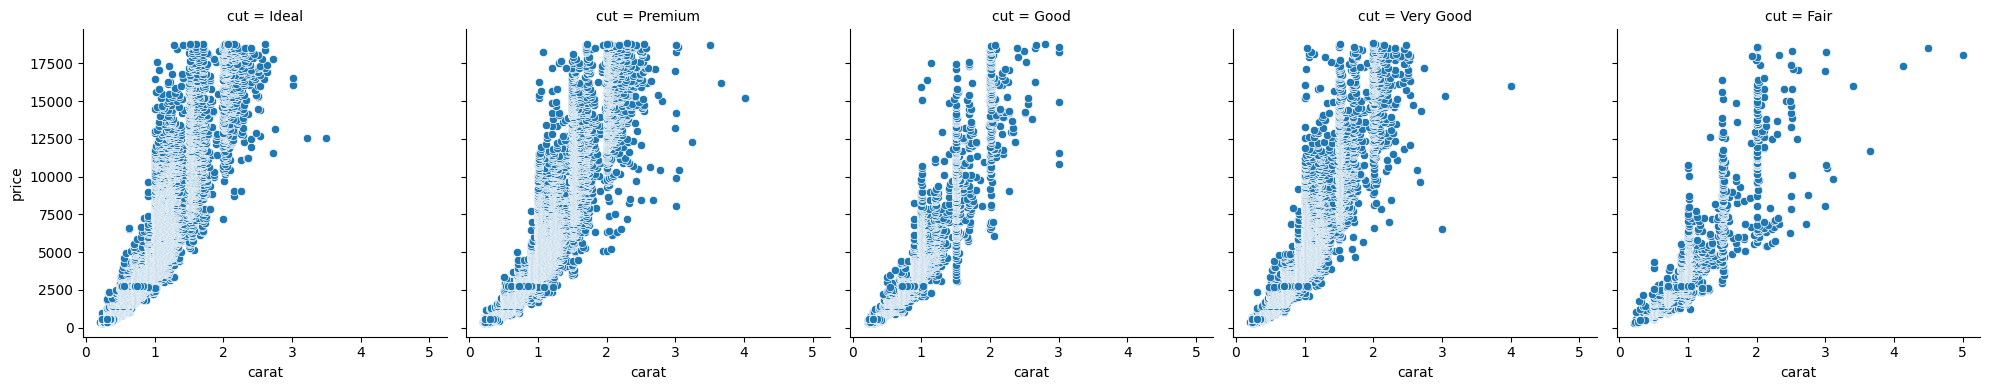

In [22]:
# FacetGrid for price vs carat, separated by cut
g = sns.FacetGrid(dataset, col="cut", height=4)
g.map(sns.scatterplot, "carat", "price")
plt.show()

Each facet represents the relationship between carat and price for a particular cut quality.  

You can compare the trends across different cuts. For example:
1. Do diamonds with an Ideal cut tend to have a higher price for the same carat size compared to Fair cut diamonds?
2. Are there any differences in the distribution or spread of prices between cuts? 

Facet for 'Carat' vs. 'Price' by 'Cut':
1. In the **Ideal cut facet** we notice **steeper increase** in price as Carat **increases** compared to the **Fair Cut Facet**.  
This could indicate that for **high-quality cuts like Ideal**, price grows more sharply with size than for lower-quality cuts like Fair.

2. **The Fair cut facet** shows **lower prices overall** for diamonds of similar carat size, suggesting that **cut quality has a significant impact on price**.